# Proyecto Integrado 1 Conjunto de datos de la tienda Ice

## Introducción
Analizaremos el conjunto de datos /datasets/games.csv de la tienda Ice para extraer información valiosa y ayudar en la toma  de decisiones con nuestros hallazgos. Llevaremos a cabo diferentes etapas.

### Etapas
 1. Abriremos el archivo y estudiaremos la información en general.
 2. Prepararemos los datos.
 3. Analizaremos los datos.
 4. Crearemos un perfil de usuario por cada Región.
 5. Probaremos Hipotesis.
 6. Escribiremos una conlusión General.

# Etapa 1. Abriremos el Archivo y estudiaremos la información en General.

In [1]:
#importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns

In [2]:
# leer el archivo y almacenarlo en df
df = pd.read_csv('/datasets/games.csv')

In [3]:
# obtener información general sobre el conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df['Year_of_Release'].head()

0    2006.0
1    1985.0
2    2008.0
3    2009.0
4    1996.0
Name: Year_of_Release, dtype: float64

## Observaciones
Podemos ver que todas las columnas son de tipo `object` o `float` y en este estudio General de Informacion podemos ver que la mayoria de las columnas de nuestro conjunto de datos estan completas sin datos faltantes, exceptuando principalmente aquellas columnas que tienen que ver con la calificación de los videojuegos, columnas tales como `Critic_Score, User_Score` entre otras. Finalmente tambien podemos ver que la columna `Year_of_Release` es de tipo `Float` lo cual no nos genera ningun problema usarlo de esa forma por lo tanto lo dejaremos asi.

# Etapa 2. Prepararemos los datos.

In [6]:
# Pondremos en minusculas todos los nombres de las columnas
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
#Encontrar el porcentaje de Datos ausentes por columna
n_rows = df.shape[0]
100 * df.isna().sum()/ n_rows

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

In [8]:
#Encontrar la cantidad de duplicados
df.duplicated().sum()

0

In [9]:
#Analisis de la columna "user_score"
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
#Remplazar los valores tbd por NAN
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')

In [11]:
# Ventas totales por juegos 
df['total_sales'] = (df['jp_sales'] + df['na_sales'] + df['eu_sales'] + df['other_sales'])

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Observaciones
 1. Primero convertimos todos los nombres de nuestras columnas a minusculas para que nos sea mas facil trabajar con ellas de esa forma y asi establecer un solo formato y poder evitar errores al llamar columnas. 
 
 
 2. Obtuvimos el porcentaje de valores nulos en nuestras columnas y decidimos dejarlos asi para no llenarlos con algun otro valor que en un futuro segaria nuestros calculos y afectara nuestras hipotesis, por lo tanto los dejamos como NAN y no con 0 o algun otro valor.
 
 
 3. Buscamos por valores duplicados pero no hallamos ninguno.
 
 
 4. Encontramos que la columna `df['user_score']` contiene valores `tbd` los cuales cambiamos por `NaN` para que no afectara nuestros calculos.
 
 
 5. Por ultimo creamos una nueva columna llamada `total_sales` que contiene el numero total de ventas por videojuego.
 

# Etapa 3. Analizaremos los datos.

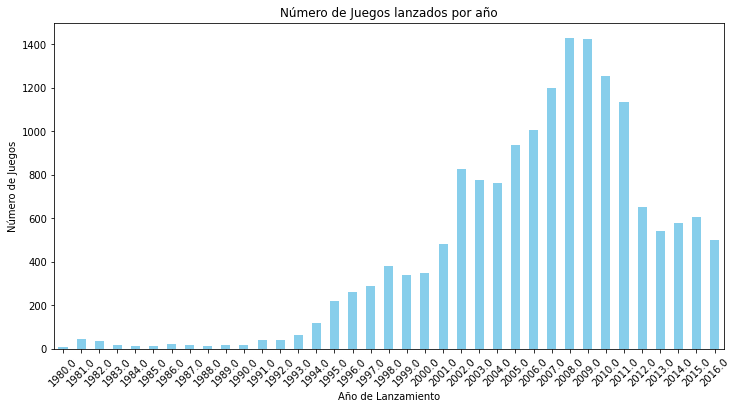

In [12]:
#Encontrar cuantos juegos fueron lanzados por año en orden cronologico
df_year_of_release = df['year_of_release'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
df_year_of_release.plot(kind='bar', color='skyblue')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.title('Número de Juegos lanzados por año')
plt.xticks(rotation=45)
plt.show()

Al poder visualizar cuantos juegos fueron vendidos por año podemos ver que a medida que el tiempo avanzo se lanzaron mas juego y que el auge en el alza de venta de juegos estuvieron aproximadamente entre los años 2006 y 2011 y despues descendieron un poco las ventas. En si no podemos hacer conlusiones estadisticamente relevantes para cada año ya que los juegos estan ampliamente distibuidos en todos los años. Algo que se puede hacer es crear grupos es decir categorizar y apartir de ahi poder sacar conclusiones significativas.

In [13]:
# Ventas totales por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index()
display(platform_sales)

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Con este analisis podemos ver que nuestras top 5 de plataformas mas vendidas son `PS2, X360, PS3, Wii, DS,` por lo cual usaremos estas 5 plataformas para crear una dstribucion basada en los datos de cada año

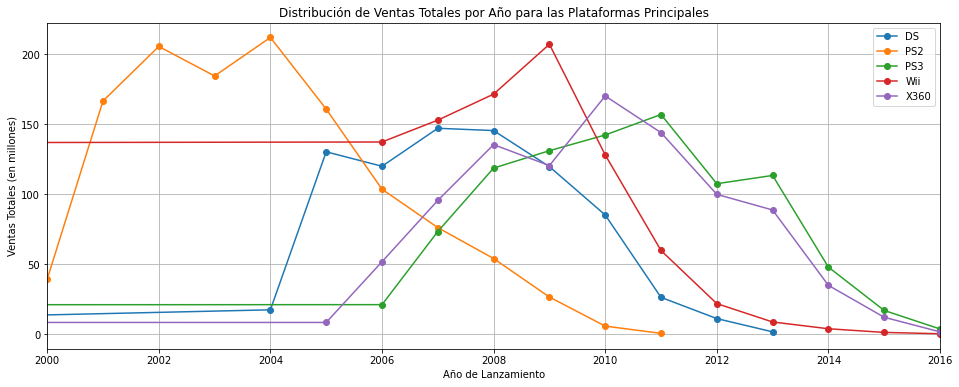

In [14]:
#Crearemos la distribucion para las top 5 plataformas con mayores ventas basadas en los datos de cada año.

# Primero mas que nada por estetica haremos que `year_of_release` este en tipo int para que no ocupe mucho espacio en tabla.

df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)
platform_sales['year'] = df['year_of_release']

#Encontrar el top 5 de plataformas con mayores ventas

top_platforms = df.groupby('platform')['total_sales'].sum().nlargest(5).index

# Filtraremos el DataFrame para solo poner nuestras top 5 plataformas en el Grafico que crearemos.

filtered_df = df[df['platform'].isin(top_platforms)]

#Construiremos un linechart que represente la distribucion de cada plataforma basada en los datos de cada año.
plt.figure(figsize=(16, 6))
for platform, platform_df in filtered_df.groupby('platform'):
    platform_df.groupby('year_of_release')['total_sales'].sum().plot(label=platform, marker='o')

plt.title('Distribución de Ventas Totales por Año para las Plataformas Principales')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (en millones)')
plt.legend()
plt.grid(True)
plt.xlim(2000, max(df['year_of_release']))  # Establecer el límite inferior del eje x en 2000
plt.show()





Esto tiene mucho sentido ya que al pasar los años se sacan nuevas plataformas mas avanzadas con nuevas caracteristicas que a las personas les atrae mas y por lo tanto las personas empiezan a comprar la nueva plataforma y dejan de comprar la plataforma que ya se considera antigua por que tiene menos cualidades que la nueva y por lo tanto bajan las ventas de la plataforma anterior.

Un ejemplo muy bueno de esto son las plataformas de la `PS2 Y PS3`podemos ver que justamente en el punto en el que las ventas de la `PS3` osea la linea verde que empieza a subir en el año `2006` es en ese mismo año que empiezan a bajar las ventas de la version anterior osea la `PS2` la linea naranja.

Asi que generalmente el tiempo en el que empiezan a desaparecer las plataformas tiene que ver con la aparición de otras plataformas. Lo mismo aplica para los carros, en esta epoca no es muy comun que las personas tengan carros jalados por caballos reales por que ya hay nuevos carros que funcionan con gasolina pero si no hubieran nuevos carros muy probablemente se seguirian comprando el mismo tipo de carros jalados por caballos.

Asi que si nosotros quisieramos determinar para que periodos deberiamos de tomar los datos para construir un modelo predictivo debemos de tomar en cuenta el tiempo que tarda en aparecer nuevas plataformas.

Una de las plataformas mas rentables que podemos ver es la del playstation ya que dos de sus variantes aparecen en el top 5 y podemos ver que ambas alcanzaron muy buenas ventas, teniendo asi la `PS2` el primer lugar de todas que en su tope tuvo un aproximado de `205 millones` de ventas en el año `2004` y la `PS3` un aproximado de `203 millones de ventas` en el año `2009`.

## Ahora crearemos un Dataframe para poder llevar a cabo un pronostico del año siguiente
Para esto tomaremos del año 2012 al 2016. Decidimos tomar estos para excluir información irrelevante de datos muy antiguos o platadormas que se han descontinuado. Ademas este rango esta mas actualizado y tiene mayor presencia de juegos y plataformas populares que de años anteriores.

In [15]:
df = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2016)]
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


# Crearemos un diagrama de caja para las ventas globales de todos los juegos,

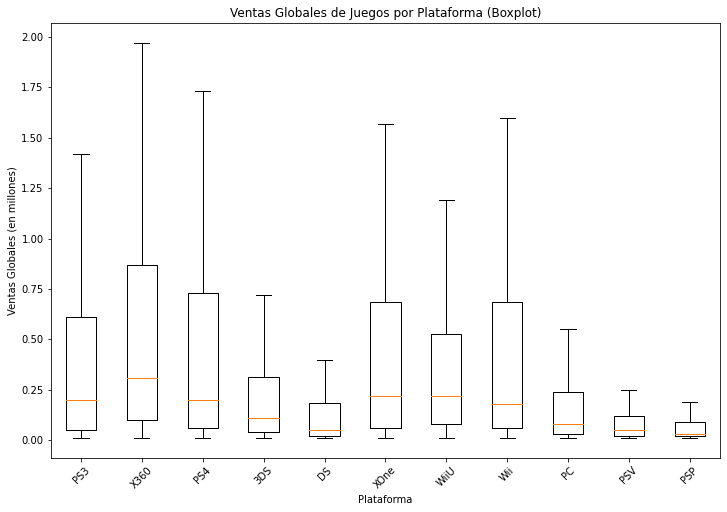

In [16]:
# Construir un diagrama de caja para las ventas globales desglosadas por plataforma
plt.figure(figsize=(12, 8))
plt.title('Ventas Globales de Juegos por Plataforma (Boxplot)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45)

# Filtrar juegos con ventas globales que no sean nulas
df_filtered = df.dropna(subset=['total_sales'])

# Crear el diagrama de caja sin valores atipicos
plt.boxplot([df_filtered[df_filtered['platform'] == platform]['total_sales'].values for platform in df_filtered['platform'].unique()],
            labels=df_filtered['platform'].unique(), showfliers = False)

plt.show()

La mayoria de las ventas promedio de las plataformas son muy similares y caen el 90% de ellas en el rango de 0 millones a 0.25 millones pero partiendo del promedio para el 50 porciento de arriba hay mucha diferencia. Esto quiere decir que la mayoria de las plataformas cumple con el mismo promedio minimo de ventas pero hay varios que sus ventas se extienden mucho mas arriba pero debido a que suele variar demasiado las ventas superiores no pueden alzar demasiado su promedio ya que no es siempre seguro que alcanzen muchas ventas pero si es mas seguro una cantidad minima de ventas. Hay principalmente 1 plataforma que su promedio esta por encima de los demas y esta plataforma es `X360` la cual tiene un prmedio de ventas entre  0.25 millones y  0.5 millones.

#  Crearemos un gráfico de dispersión y calcularemos la correlación entre las reseñas y las ventas.

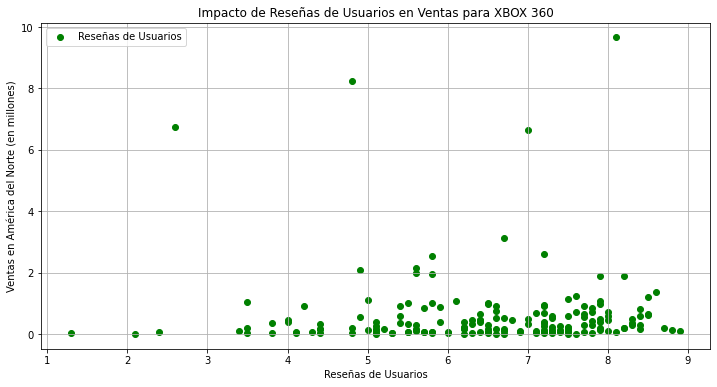

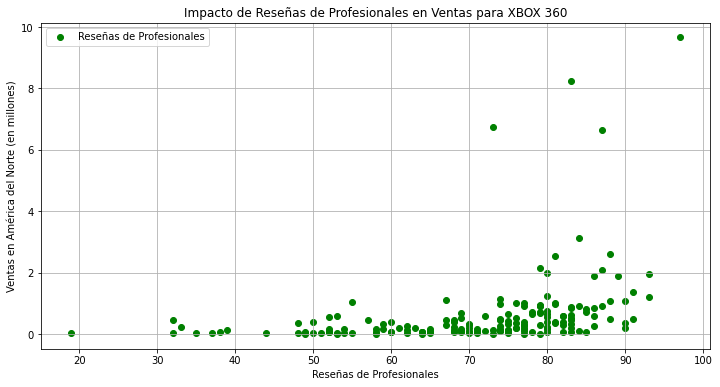

Correlación entre reseñas de usuarios y ventas: -0.0020140394826897922
Correlación entre reseñas de profesionales y ventas: 0.36057348885073354


In [17]:
# Filtrar los datos para solo tener los de la plataforma playstation
xbox_data = df[df['platform'] == 'X360']

# Filtrar los juegos para quitar los que no tengan reseñas
xbox_data = xbox_data.dropna(subset=['user_score', 'critic_score', 'total_sales'])

# Crear un gráfico de dispersión para las reseñas de los usuarios versus ventas
plt.figure(figsize=(12, 6))
plt.scatter(x='user_score', y='na_sales', data=xbox_data, color='green', label='Reseñas de Usuarios')
plt.title('Impacto de Reseñas de Usuarios en Ventas para XBOX 360')
plt.xlabel('Reseñas de Usuarios')
plt.ylabel('Ventas en América del Norte (en millones)')
plt.legend()
plt.grid(True)
plt.show()

# Crear un gráfico de dispersión para las reseñas de los profesionales versus ventas
plt.figure(figsize=(12, 6))
plt.scatter(x='critic_score', y='na_sales', data=xbox_data, color='green', label='Reseñas de Profesionales')
plt.title('Impacto de Reseñas de Profesionales en Ventas para XBOX 360')
plt.xlabel('Reseñas de Profesionales')
plt.ylabel('Ventas en América del Norte (en millones)')
plt.legend()
plt.grid(True)
plt.show()

# Calcular la correlación entre reseñas y ventas
correlation_user = xbox_data['user_score'].corr(xbox_data['total_sales'])
correlation_critic = xbox_data['critic_score'].corr(xbox_data['total_sales'])

print(f"Correlación entre reseñas de usuarios y ventas: {correlation_user}")
print(f"Correlación entre reseñas de profesionales y ventas: {correlation_critic}")

Podemos ver que para la cantidad de ambas reseñas tanto de usuarios como de profesionales, donde hay un numero mayor de ventas hay mas reseñas y esto tiene sentido ya que al tener mas ventas significa que ha tenido un mayor alcance que aquellos que tuvieron menos ventas por lo tanto mas gente lo conoce y hay mas probabilidad que gente centre su interes en hacer una reseña de ese juego ya que es mas conocido o mas popular.

La correlación entre reseñas de usuarios y ventas es muy pequeña ya que no se acerca mucho al uno, recordemos que si estan cercas del -1 es una correlacion negativa perfecta.

La correlación entre reseñas de profesionales y ventas tambien es muy pequeña por que no se acerca mucho al 1 y recordemos que el 1 es una correlacion positiva perfecta.

Por lo tanto para nignuna de las reseñas existe un impacto o correlacion con las ventas.

# Compararemos las ventas de los mismos juegos en otras plataformas.


Juegos que aparecen en más de una plataforma:


0                     Frozen: Olaf's Quest
1               2014 FIFA World Cup Brazil
2        3rd Super Robot Wars Z Jigoku Hen
3      3rd Super Robot Wars Z: Tengoku-Hen
4                            7 Days to Die
                      ...                 
591       Zone of the Enders HD Collection
592                      Zoo Tycoon (2013)
593                     Zumba Fitness Core
594             Zumba Fitness: World Party
595                          [Prototype 2]
Name: name, Length: 596, dtype: object

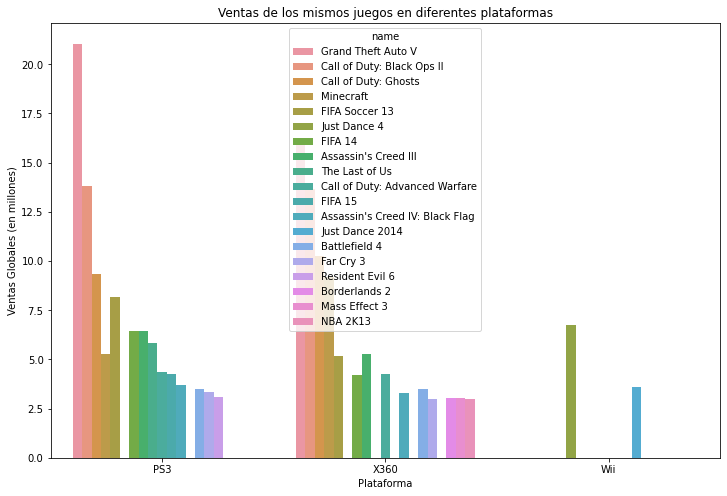

In [18]:
# Filtrar los juegos que aparecen en más de una plataforma
games_platforms_count = df.groupby('name')['platform'].nunique()

multiplatform_games = games_platforms_count[games_platforms_count > 1].reset_index()

# Mostrar los juegos y la cantidad de veces que aparecen
print("Juegos que aparecen en más de una plataforma:")
display(multiplatform_games.name)

# Filtrar el DataFrame original para incluir solo juegos multiplataforma
multiplatform_data = df[df['name'].isin(multiplatform_games.name)] 
multiplatform_data = multiplatform_data[multiplatform_data['platform'].isin(top_platforms)] 

plt.figure(figsize=(12, 8))
sns.barplot(x='platform', y='total_sales', hue='name', data= multiplatform_data.iloc[0:30])
plt.title('Ventas de los mismos juegos en diferentes plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.show()




Podemos ver que las ventas de los juegos si cambian dependiendo de la plataforma. Esto quiere decir que hay juegos que se venden mas en ciertas plataformas especificas que en otras. 

Ejemplo podemos ver que nuestra primer barra de un color rosita representa el juego `Grand Theft Auto` el cual se vende mucho en la plataforma de `PS3` pero se vende menos en el `X360` y podemos ver que esta barra no aparece para Wi ya que wi no comparte ese juego con dichas plataformas.

Por ultimo tambien podemos ver que es muy comun que las plataformas `PS3 y X360` compartan mas videojuegos mientras que las plataforma de `Wi` tienen juegos mas exclusivos, es decir que no comparten los mismos juegos con otras plataformas o no es muy comun que tenga los mismos juegos que otras plataformas y podemos ver que las plataformas del  `PS3 y X360` comparten muchos videojuegos y tienen muchas mas ventas que Wi que no comparte tantos videojuegos con las demas plataformas.

Quizas esto pueda hacer que mas usuarios opten por comprar una `PS3 o X360` porque estas plataformas tienen mas variedades de juegos que no podrias jugar en otra plataforma como lo es un Wi.

# Grafico con la distribución general de los juegos por género.

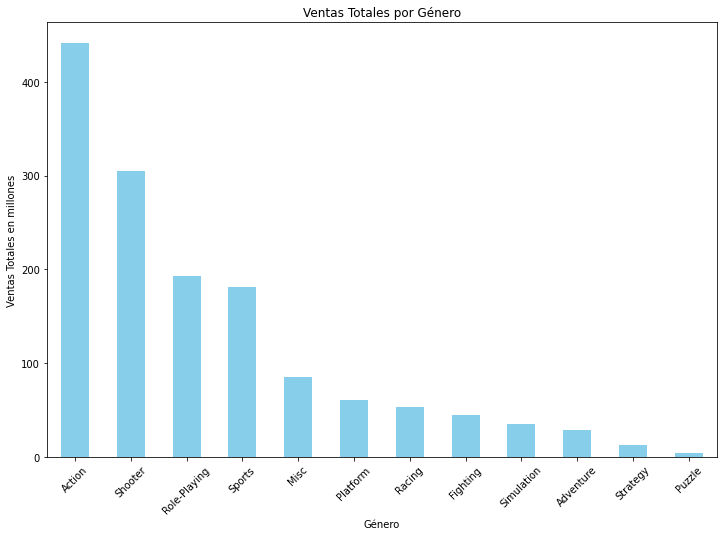

In [19]:
# Agrupar por género y sumar las ventas totales
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Crear un gráfico de barras para las ventas totales por cada género
plt.figure(figsize=(12, 8))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales en millones')
plt.xticks(rotation=45)
plt.show()

Los 3 generos mas rentables son empezando por el mas rentable `Action` con ventas superiores a los  `400` millones, despues `Shooter` con aproximadamente  `300` millones  y en tercer lugar `Role-playing`con aproximadamente `190` millones de ventas.

Podemos decir que los generos con Barras mas altas tienen mayores ventas y los generos con barras mas chicas tienen menos ventas.

# Etapa 4. Crearemos un perfil de usuario por cada Región.

## Ahora obtendremos las cinco plataformas principales por región

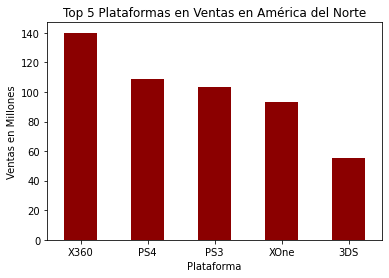

In [20]:
#Las cinco plataformas principales por region con base a las ventas

# Calcular las cinco plataformas principales para Norte America
top_platforms_na = df.groupby('platform')['na_sales'].sum().nlargest(5)

# Crearemos un grafico de barras
fig, ax = plt.subplots()
top_platforms_na.plot(kind='bar', color='darkred')
ax.set_ylabel('Ventas en Millones')
ax.set_xlabel('Plataforma')
ax.set_title('Top 5 Plataformas en Ventas en América del Norte')
plt.xticks(rotation=360)
plt.show()



En America del Norte podemos ver que las plataformas del `X360 y PS4` tienen mayores ventas en comparación de las otras plataformas teniendo el primer lugar `X360` con una gran diferencia en comparacion a las ventas de las otras plataformas.

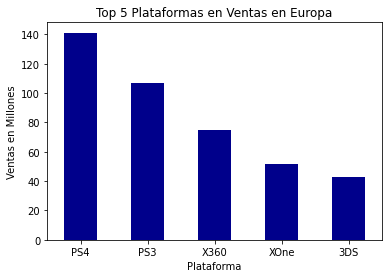

In [21]:
# Calcular las cinco plataformas principales para Europa
top_platforms_eu = df.groupby('platform')['eu_sales'].sum().nlargest(5)
fig, ax = plt.subplots()
top_platforms_eu.plot(kind = 'bar', color = 'darkblue')
ax.set_ylabel('Ventas en Millones')
ax.set_xlabel('Plataforma')
ax.set_title('Top 5 Plataformas en Ventas en Europa')
plt.xticks(rotation = 360)
plt.show()


En Europa podemos ver que las plataformas del `PS4 y PS3` tienen mayores ventas en comparación de las otras plataformas. Teniendo el Playstation el primer lugar con una diferencia significativa en ventas en comparacion a las demas plataformas.

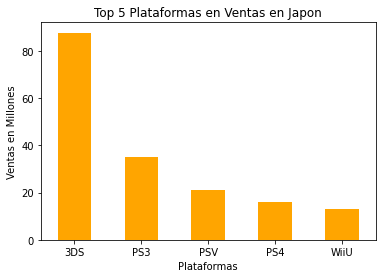

In [22]:
top_platforms_jp = df.groupby('platform')['jp_sales'].sum().nlargest(5) 
fig, ax = plt.subplots()
top_platforms_jp.plot(kind = 'bar', color = 'orange')
ax.set_ylabel('Ventas en Millones')
ax.set_xlabel('Plataformas')
ax.set_title('Top 5 Plataformas en Ventas en Japon')
plt.xticks(rotation = 360)
plt.show()

En Japon podemos ver que las plataformas del `3DS y PS3` tienen mayores ventas en comparación de las otras plataformas. Teniendo en primer lugar el `3DS` y que tiene una diferencia muy significativa en ventas teniendo mas que el doble de ventas que todas las demas plataformas.

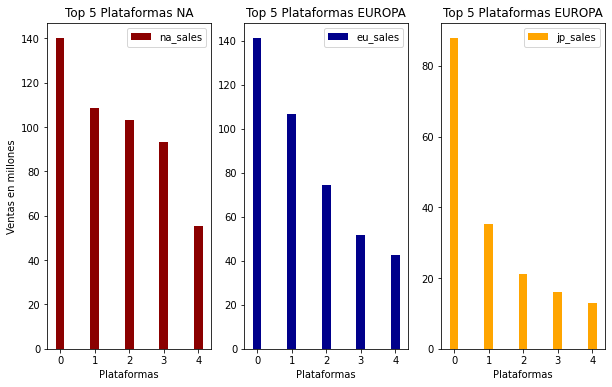

In [23]:
# Crear un gráfico de barras
fig, ax = plt.subplots(1,3,figsize=(10, 6))

# graficar
top_platforms_na.plot(kind='bar', color='darkred', width=0.25, label='na_sales', ax = ax[0])
top_platforms_eu.plot(kind='bar', color='darkblue', width=0.25, label='eu_sales', ax = ax[1])
top_platforms_jp.plot(kind='bar', color='orange', width=0.25, label='jp_sales', ax = ax[2])

# Configurar el gráfico para NA
ax[0].set_ylabel('Ventas en millones')
ax[0].set_xlabel('Plataformas')
ax[0].set_title('Top 5 Plataformas NA')
ax[0].legend()
ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 360)

# Configurar el gráfico para Europa
ax[1].set_xlabel('Plataformas')
ax[1].set_title('Top 5 Plataformas EUROPA')
ax[1].legend()
ax[1].set_xticklabels(ax[0].get_xticks(), rotation = 360)

# Configurar el gráfico para Japon
ax[2].set_xlabel('Plataformas')
ax[2].set_title('Top 5 Plataformas EUROPA')
ax[2].legend()
ax[2].set_xticklabels(ax[0].get_xticks(), rotation = 360)

# Mostrar el gráfico
plt.show()


Podemos ver claramente que la region que mas vende es Norte America y despues Europa y por ultimo Japon. Algo que pudimos ver tambien es que las Plataformas que tiene presencia en todas y que tiene la mayor en Norte America y Europa es la del playstation y podemos ver que de hecho estas dos regiones comparten muchas top plataformas en comun como lo son la `PS4,PS3 y X360` pero podemos ver que la region de Japon es un poco mas diferente teniendo o mas bien compartiendo en su top solo playstation con los demas y teniendo otras plataformas que predominan mas como el `3DS`.

# Conlusion
Todo esto tiene demasiada logica ya que cuando creamos el conjunto `platform_sales` encontramos las plataformas con mayores ventas y podemos ver claramente que las top 3 plataformas con mayores ventas en general son `PS3, X360 Y PS4` tambien cuando hizimos el analisis de las ventas en relacion de aquellos juegos que se vendian en otras plataformas en nuestro conjunto de datos `multiplatform_data` y que despues graficamos logramos ver que eran estas mismas plataformas `PS3 Y X360`, eran las plataformas que mas juegos compartian y debido a que estas plataformas son las mas vendidas en Norte America y en Europa tiene sentido que Japon tenga menos ventas en millones que estas dos regiones de una manera significativa. 

## Ahora obtendremos los 5 generos principales por region

Text(0.5, 1.0, 'Top 5 Géneros en Ventas en América del Norte')

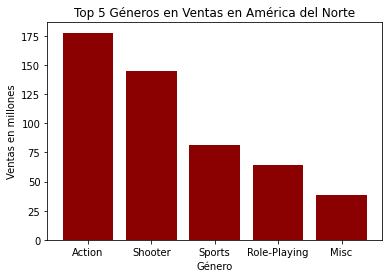

In [24]:
#Obtendremos los top 5 generos de la region Norte america
top_generos_na = df.groupby('genre')['na_sales'].sum().nlargest(5).reset_index()

# Crearemos el grafico
fig, ax = plt.subplots()
ax.bar(top_generos_na['genre'], top_generos_na['na_sales'],  color='darkred')
ax.set_ylabel('Ventas en millones')
ax.set_xlabel('Género')
ax.set_title('Top 5 Géneros en Ventas en América del Norte')

En la Region de Norte America los generos mas dominantes en ventas son `Action y Shooter`

Text(0.5, 1.0, 'Top 5 Generos en ventas en Europa')

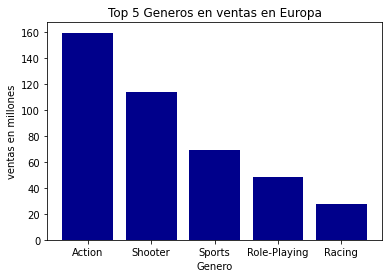

In [25]:
#Obtendremos los top 5 generos de la region europa
top_generos_eu = df.groupby('genre')['eu_sales'].sum().nlargest(5).reset_index()

#Crearemos el grafico
fig, ax = plt.subplots()
ax.bar(top_generos_eu['genre'], top_generos_eu['eu_sales'], color = 'darkblue')
ax.set_ylabel('ventas en millones')
ax.set_xlabel('Genero')
ax.set_title('Top 5 Generos en ventas en Europa')


En la Region de Europa los generos mas dominantes en ventas son `Action y Shooter` igual que Norte America.

Text(0.5, 1.0, 'Top 5 Generos en ventas en Japon')

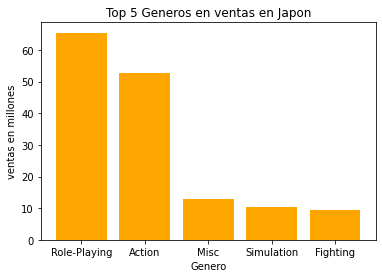

In [26]:
#Obtendremos los top 5 generos de la region Japon
top_generos_jp = df.groupby('genre')['jp_sales'].sum().nlargest(5).reset_index()

#Crearemos el grafico
fig, ax = plt.subplots()
ax.bar(top_generos_jp['genre'], top_generos_jp['jp_sales'], color = 'orange')
ax.set_ylabel('ventas en millones')
ax.set_xlabel('Genero')
ax.set_title('Top 5 Generos en ventas en Japon')


En la Region de Japon los generos mas dominantes en ventas son `Role-Playing y Action`.

# Conlusion
De una forma muy similar podemos ver que las regiones de Norte America y Europa comparten de una forma muy similar el mismo top de generos y de la misma forma Japon sigue teniendo un giro un poco diferente al de las otras dos regiones al tener como principal genero `Role-Playing` Pero dejando de fuera eso podemos ver que tienen muy buen exito aquellos juegos de Accion y de disparos en Europa y Norte America y de forma general el genero de Accion tiene mucho exito en todas las regiones.

## Ahora revisaremos como por region afecta el rating

Text(0.5, 1.0, 'Impacto del rating en las ventas de NA')

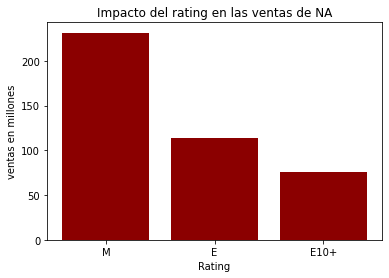

In [27]:
# Top ratings que esta mas presente en las ventas de Norte America
rating_na = df.groupby('rating')['na_sales'].sum().nlargest(3).reset_index()

#
fig, ax = plt.subplots()
ax.bar(rating_na['rating'], rating_na['na_sales'], color = 'darkred')
ax.set_ylabel('ventas en millones')
ax.set_xlabel('Rating')
ax.set_title('Impacto del rating en las ventas de NA')

Podemos ver que en la región de Norte America el rating o mejor dicho las clasificaciones de los videojuegos afecta en gran manera las ventas. En primer lugar tenemos la categoria `M` con una gran cantidad de ventas ya que la clasificación M significa `Mature` que es maduros para mayores de 17 y podemos ver que una gran parte de personas que juegan videojuegos son de esa edad similar o les gusta ese tipo de juegos.

Despues la clasificación `E` significa `Everyone` osea que es un videojuego que todos pueden ver y usar por que no contiene contenido muy violento o sexual y por lo tanto abarca una comunidad grande y queda en 2 lugar.

En tercer lugar tenemos la categoria `E10+` la cual es una categoria para todos los mayores de 10 años.

Text(0.5, 1.0, 'Impacto del rating en las ventas de Europa')

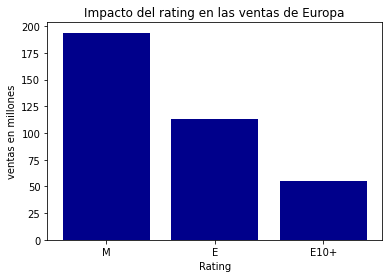

In [28]:
# Top ratings que esta mas presente en las ventas de Norte America
rating_eu = df.groupby('rating')['eu_sales'].sum().nlargest(3).reset_index()

#
fig, ax = plt.subplots()
ax.bar(rating_eu['rating'], rating_eu['eu_sales'], color = 'darkblue')
ax.set_ylabel('ventas en millones')
ax.set_xlabel('Rating')
ax.set_title('Impacto del rating en las ventas de Europa')

Europa tiene el mismo top 3 de clasficaciones con mayores ventas que Norte America solo que podemos ver que hay una cantidad menor de ventas en todas las categorias pero eso no marca una diferencia entre en el orden de las 3 top categorias.

Asi que podemos ver que ambos tienen como comun la clasificacion `M` con mayores ventas que las demas clasificaciones.

Text(0.5, 1.0, 'Impacto del rating en las ventas de Japon')

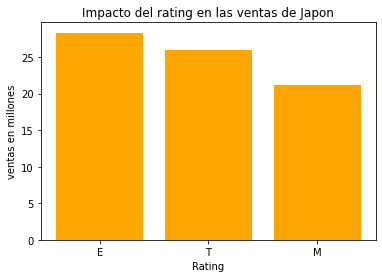

In [29]:
# Top ratings que esta mas presente en las ventas de Norte America
rating_jp = df.groupby('rating')['jp_sales'].sum().nlargest(3).reset_index()

#
fig, ax = plt.subplots()
ax.bar(rating_jp['rating'], rating_jp['jp_sales'], color = 'orange')
ax.set_ylabel('ventas en millones')
ax.set_xlabel('Rating')
ax.set_title('Impacto del rating en las ventas de Japon')

Podemos ver que Japon tambien tiene las categorias `M y E` en sus top 3 de ventas al igual que Norte America y Europa.

Algo que cabe destacar es el hecho de que tengan un orden diferente a las demas region y que no exista mucha diferencia en la cantidad de ventas como en las regiones de America del Norte y Europa.

A diferencia de Europa y America del Norte la region de Japon no tiene en primer lugar a la categoria `M` ya que aunque si esta en su top 3, esta en el tercer lugar y la categoria `E` esta en primer lugar.

Cabe notar que las ventas en japon son muy inferiores en comparacion a las ventas de Japon y America del Norte.

## Conclusion
Claramente las 2 clasificaciones que tienen mayores en todas las regiones son `E` de Everyone(todos) `M` de Mature(Maduro).

# Etapa 5. Probaremos las Hipotesis

### Ahora probaremos la hipotesis de que Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
1. Nuestra Hipotesis Nula sera que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2. Nuestra Hipotesis Alternativa sera que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
3. Para lograr esto llevaremos acabo un ttest con nuestro valor Alfa en 0.05 osea en un 5 porciento.

In [30]:
# Primero filtraremos los datos para solo tener Xbox One y PC
x_one_data = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_data = df[df['platform'] == 'PC']['user_score'].dropna()

#Verificar que las varianzas sean las mismas o diferentes
varianza_x = x_one_data.var() #Varianza de Xbox Ones
print(f'Varianza de Xbox One:{varianza_x}')
varianza_p = pc_data.var() #Varianza de PC
print(f'Varianza de PC:{varianza_p}')
print('Las varianzas no son iguales por lo tanto estableceremos equal_var como False en nuestro ttest\n')

#Revisar las desviaciones estandar
dst_x = x_one_data.std() #Desviacion estandar de Xbox Ones
print(f'Desviacion estandar de Xbox One:{dst_x}')
dst_p = pc_data.std() #Desviacion estandar de PC
print(f'Desviacion estandar de PC:{dst_p}')

# Realizaremos el ttest
alpha = 0.05
results , pvalue = ttest_ind(x_one_data, pc_data, equal_var = False)
display('p_value:', pvalue)

if pvalue < alpha:
    print("Rechazamos la hipótesis nula.")
else:
    print("No se puede rechazar la hipotesis nula")

Varianza de Xbox One:1.9069968429360695
Varianza de PC:2.770443997158418
Las varianzas no son iguales por lo tanto estableceremos equal_var como False en nuestro ttest

Desviacion estandar de Xbox One:1.380940564592144
Desviacion estandar de PC:1.6644650783835682


'p_value:'

0.5489537965134912

No se puede rechazar la hipotesis nula



No se puede rechazar la hipotesis nula con la informacion que tenemos. Al hacer nuestro test estadistico podemos ver que nuestro valor de probabilidad es superior al valor alpha que establecimos lo cual nos dice que no hay una diferencia significativa entre las calificaciones promedio de los usuarios de las plataformas Xbox one y PC lo cual significa que son muy similares. Debido a que con la informacion que tenemos que nos dice que las calificaciones entre ambas plataformas son muy similares por lo tanto no existe un cambio significativo y se opta por no rechazar la hipotesis nula.

### Ahora probaremos la siguiente hipotesis de que no hay diferencia significativa en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes.

1. Nuestra Hipotesis Nula sera que no hay diferencia significativa en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes.
2. Nuestra Hipotesis Alternativa sera que hay diferencia significativa en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes.
3. Para lograr esto llevaremos acabo un ttest con nuestro valor Alfa en 0.05 osea en un 5 porciento.

In [31]:
df['genre'].unique

<bound method Series.unique of 16             Action
23             Action
31            Shooter
33       Role-Playing
34            Shooter
             ...     
16703       Adventure
16707            Misc
16710          Action
16712       Adventure
16714      Simulation
Name: genre, Length: 2886, dtype: object>

In [32]:
# Primero filtraremos los datos para solo tener los generos Accion y Deportes
action_data = df[df['genre'] == 'Action']['user_score'].dropna()
sports_data = df[df['genre'] == 'Sports']['user_score'].dropna()

#Verificar que las varianzas sean las mismas o diferentes
varianza_accion = action_data.var() #Varianza de Xbox Ones
print(f'Varianza de genero de accion:{varianza_x}')
varianza_p = sports_data.var() #Varianza de PC
print(f'Varianza de genero de deportes:{varianza_p}')
print('Las varianzas no son iguales por lo tanto estableceremos equal_var como False en nuestro ttest\n')

#Revisar las desviaciones estandar
dst_x = action_data.std() #Desviacion estandar de Xbox Ones
print(f'Desviacion estandar de genero de accion:{dst_x}')
dst_p = sports_data.std() #Desviacion estandar de PC
print(f'Desviacion estandar de genero de deportes:{dst_p}')

# Realizaremos el ttest
alpha = 0.05
results , pvalue = ttest_ind(action_data, sports_data, equal_var = False)
display('p_value:', pvalue)

if pvalue < alpha:
    print("Rechazamos la hipótesis nula.")
else:
    print("No se puede rechazar la hipotesis nula")

Varianza de genero de accion:1.9069968429360695
Varianza de genero de deportes:3.022890298704732
Las varianzas no son iguales por lo tanto estableceremos equal_var como False en nuestro ttest

Desviacion estandar de genero de accion:1.3744395401161926
Desviacion estandar de genero de deportes:1.7386461108301285


'p_value:'

4.24307776572644e-20

Rechazamos la hipótesis nula.


Rechazamos la hipótesis nula por que con la informacion que tenemos nuestro test estadistico nos dice que hay una diferencia significativa entre las calificaciones promedio de los usuarios entre los generos de Accion y deporte. Osea que no son muy similares y debido a que no las calificaciones promedio de los usuarios para el genero de Accion y deporte no son similares y que existe un cambio significativo en las calificaciones de los generos se opta por rechazar la hipotesis nula.

# Conclusion General del Proyecto

Este proyecto requirio de varias funciones que nos ayudaron a crear visualizaciones para poder comparar de una forma mas efectiva las diferencias que exisitan entre diferentes categorias, ya fuera que categorizaramos por region o por plataforma, fue muy crucial usar graficas para poder presentar la información de una forma mas efectiva. De este analisis quisiera destacar 5 puntos principales que son los siguientes

1. La Region con mayores ventas es Norte America

2. Las plataformas con Mayores ventas y que comparten mas juegos son Play Station y XBOX

3. La categorias `M y E` son las categorias de juegos que tiene mayores ventas.

4. Norte America y Europa tienen muchas cosas en comun como compartir top plataformas y categorias de juegos.

5. Las calificaciones de los usuarios para los generos de Accion y Deporte son muy diferentes.
